**1**. (20 points)

There is an SQLite3 database `flowers.db` in the `data` sub-directory. Read this into a `pandas` DataFrame, and show lines 5-10 of the DataFrame.

In [ ]:
import sqlite3
import pandas as pd

Find what tables are in the database

In [7]:
con = sqlite3.connect('data/flowers.db')
cr = con.execute("SELECT name FROM sqlite_master WHERE type='table'")
cr.fetchall()

[('iris',)]

Display rows 5 - 10

In [8]:
df = pd.read_sql('select * from iris', con)
df.iloc[5:11,:]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa


**2**. (20 points)

Summarize the mean and coefficient of variation of each measurement by `species`.

In [9]:
import numpy as np

In [10]:
def cv(x):
    """Coefficient of variation."""
    
    return np.mean(x) / np.std(x)

In [11]:
df.groupby('Species').agg(['mean', cv])

Sepal.Length            Sepal.Width           Petal.Length  \
                   mean         cv        mean        cv         mean   
Species                                                                 
setosa            5.006  14.346019       3.428  9.135132        1.462   
versicolor        5.936  11.616817       2.770  8.916946        4.260   
virginica         6.588  10.465637       2.974  9.315426        5.552   

                      Petal.Width            
                   cv        mean        cv  
Species                                      
setosa       8.504025       0.246  2.357984  
versicolor   9.157585       1.326  6.773422  
virginica   10.162024       2.026  7.451552

**3**. (20 points)

Make a multi-plot figure containing boxplots where the x-axis is the Species and the y-axis is one of the four measurements.

In [12]:
import seaborn as sns

In [13]:
df1 = pd.melt(df, id_vars='Species')

In [14]:
df1.head()

,Species,variable,value
0,setosa,Sepal.Length,5.1
1,setosa,Sepal.Length,4.9
2,setosa,Sepal.Length,4.7
3,setosa,Sepal.Length,4.6
4,setosa,Sepal.Length,5.0


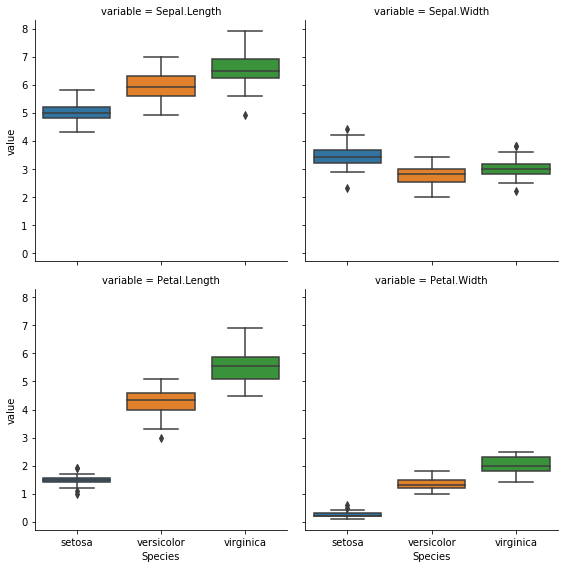

In [16]:
sns.factorplot(data=df1, x='Species', y='value',
               col='variable', col_wrap=2,
               kind='box')
pass

**4**. (20 points)

Add 2 columns `pc1` and `pc2` to the DataFrame, where `pc1` and `pc2` are the first two principal components of the 4 measurements. 

In [17]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df.iloc[:, :4])
df = df.assign(pc1=pc[:, 0], pc2=pc[:, 1])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,pc1,pc2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


**5**. (20 points)

Save the DataFrame to a CSV file, not including the index.

In [22]:
df.to_csv('data/iris_pca.csv', index=False)

In [24]:
! cat data/iris_pca.csv | head -3

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,pc1,pc2
5.1,3.5,1.4,0.2,setosa,-2.684125625969541,0.31939724658510277
4.9,3.0,1.4,0.2,setosa,-2.7141416872943256,-0.17700122506477942
